In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'improved_ff_totxsec/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

FF = imp.load_source('FF_functions',lib_function_dir+'FF_functions.py')

Welcome to JupyROOT 6.18/04
N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [2]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]


In [5]:
NumberOfFiles = 5000
POT_file = 5e8
activeVol_Area = 128.175*2*116.5*2
pot_data = 2.144e+20

path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_flux_cv = f_flux_int.Get("hEnumu_cv")
flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*pot_data

roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))

N_tot = roh_data*N_A*N_nucleons*V_fid/mol

print 'N_tot = ',N_tot,'  flux= ',flux_cv, 'for pot: ', pot_data

N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [6]:
#store all histograms needed in one file: bkg, smearing, covariance
if(1):
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'

    f_cv = ROOT.TFile.Open(path_detsys+'xsec_detsys_CV_2D_t/xsec_detsys_CV_2D.root', 'read')
    f_dedx = ROOT.TFile.Open(path_detsys+'xsec_detsys_dEdx_2D_t/xsec_detsys_dEdx_2D.root', 'read')
    f_LYatt = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYAtt_2D_t/xsec_detsys_LYAtt_2D.root', 'read')
    f_LYdown = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYdown_2D_t/xsec_detsys_LYdown_2D.root', 'read')
    f_LYray = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYRay_2D_t/xsec_detsys_LYRayleigh_2D.root', 'read')
    f_recomb2 = ROOT.TFile.Open(path_detsys+'xsec_detsys_recomb2_2D_t/xsec_detsys_recomb2_2D.root', 'read')
    f_sce = ROOT.TFile.Open(path_detsys+'xsec_detsys_SCE_2D_t/xsec_detsys_SCE_2D.root', 'read')
    f_waxz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleXZ_2D_t/xsec_detsys_WireAngleXZ_2D.root', 'read')
    f_wayz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleYZ_2D_t/xsec_detsys_WireAngleYZ_2D.root', 'read')
    f_wmx = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModX_2D_t/xsec_detsys_WireModX_2D.root', 'read')
    f_wmyz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModYZ_2D_t/xsec_detsys_WireModYZ_2D.root', 'read')

    f_all = ROOT.TFile.Open(path_detsys+'xsec_detsys_all_2D_t/Detector_systematic_2D.root', 'read')
    
    h_true_cv = f_cv.Get('h_gen_all')
    h_sel_cv = f_cv.Get('h_sel_all')

    h_ext_cv = f_cv.Get('h_ext_all')
    h_dirt_cv = f_cv.Get('h_dirt_all')


    h_bkg_cv = f_cv.Get('h_bkg_all')
    h_bkg_dedx = f_dedx.Get('h_bkg_all')
    h_bkg_LYatt = f_LYatt.Get('h_bkg_all')
    h_bkg_LYdown = f_LYdown.Get('h_bkg_all')
    h_bkg_LYray = f_LYray.Get('h_bkg_all')
    h_bkg_recomb2 = f_recomb2.Get('h_bkg_all')
    h_bkg_sce = f_sce.Get('h_bkg_all')
    h_bkg_waxz = f_waxz.Get('h_bkg_all')
    h_bkg_wayz = f_wayz.Get('h_bkg_all')
    h_bkg_wmx = f_wmx.Get('h_bkg_all')
    h_bkg_wmyz = f_wmyz.Get('h_bkg_all')

    h_smear_cv = f_cv.Get('h_smearing')
    h_smear_dedx = f_dedx.Get('h_smearing')
    h_smear_LYatt = f_LYatt.Get('h_smearing')
    h_smear_LYdown = f_LYdown.Get('h_smearing')
    h_smear_LYray = f_LYray.Get('h_smearing')
    h_smear_recomb2 = f_recomb2.Get('h_smearing')
    h_smear_sce = f_sce.Get('h_smearing')
    h_smear_waxz = f_waxz.Get('h_smearing')
    h_smear_wayz = f_wayz.Get('h_smearing')
    h_smear_wmx = f_wmx.Get('h_smearing')
    h_smear_wmyz = f_wmyz.Get('h_smearing')

    #save all whats needed
    RootFile = ROOT.TFile('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'+"FF_detsys.root","RECREATE");
    #blbla.Write('dfdfs')
    h_true_cv.Write('h_true_cv')
    h_sel_cv.Write('h_sel_cv')
    
    h_ext_cv.Write('h_ext_cv')
    h_dirt_cv.Write('h_dirt_cv')

    h_bkg_cv.Write('h_bkg_cv')
    h_bkg_dedx.Write('h_bkg_dedx')
    h_bkg_LYatt.Write('h_bkg_LYatt')
    h_bkg_LYdown.Write('h_bkg_LYdown')
    h_bkg_LYray.Write('h_bkg_LYray')
    h_bkg_recomb2.Write('h_bkg_recomb2')
    h_bkg_sce.Write('h_bkg_sce')
    h_bkg_waxz.Write('h_bkg_waxz')
    h_bkg_wayz.Write('h_bkg_wayz')
    h_bkg_wmx.Write('h_bkg_wmx')
    h_bkg_wmyz.Write('h_bkg_wmyz')

    h_smear_cv.Write('h_smear_cv')
    h_smear_dedx.Write('h_smear_dedx')
    h_smear_LYatt.Write('h_smear_LYatt')
    h_smear_LYdown.Write('h_smear_LYdown')
    h_smear_LYray.Write('h_smear_LYray')
    h_smear_recomb2.Write('h_smear_recomb2')
    h_smear_sce.Write('h_smear_sce')
    h_smear_waxz.Write('h_smear_waxz')
    h_smear_wayz.Write('h_smear_wayz')
    h_smear_wmx.Write('h_smear_wmx')
    h_smear_wmyz.Write('h_smear_wmyz')

    RootFile.Close()

In [7]:
def smear_plot(h_true):
    if h_true.GetNbinsX() != 43:
        h_true_this = ROOT.TH1F('h_true_this',"h_true_this",43,0,43)
        for i in range(43):
            h_true_this.SetBinContent(i+1,h_true.GetBinContent(i+1))
    else:
        h_true_this = h_true.Clone()
    h_smear = f_cv.Get('h_smearing')
    smear_mat = FF.plot2arr(h_smear,2)
    eff_vec = FF.plot2arr(h_eff,1)
    true_vec = FF.plot2arr(h_true_this,1)
    #smear_mat = smear_mat.T*eff_vec
    reco_vec = true_vec.dot(smear_mat)
    h_reco = FF.arr2plot(reco_vec)
    
    return h_reco

In [8]:
def return_detsys_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
    f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
    para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = f_det.Get('h_bkg_detcv')
    h_bkg_cv.Scale(this_pot/9.457e+18)
    h_smear_cv = f_det.Get('h_smear_detcv')
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    h_data = ROOT.TH1F('h_data',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
            h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    h_data.Scale(this_pot/2.144e+20)
    
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    data_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        data_vec[i] = h_data.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)
    n_true = h_true.Integral(1,num_bins+1)
    n_sig = np.sum(reco_vec)
    n_data = np.sum(data_vec)
    n_dirt = np.sum(dirt_vec)
    n_ext = np.sum(ext_vec)
    n_bkg = np.sum(bkg_vec)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)

    bkg_vec_det = np.zeros((len(para),num_bins))
    reco_vec_det = np.zeros((len(para),num_bins))
    smear_mat_det = np.zeros((len(para),num_bins,num_bins))

    #sig_vec_det = np.zeros((len(para),num_bins)) # signal + bkg prediction
    res_vec_det = np.zeros((len(para),num_bins)) # residual
    res_vec = np.zeros((num_bins)) # quadratic sum

    tot_diff = np.zeros((len(para))) # quadratic sum
    xsec_diff = np.zeros((len(para))) # quadratic sum

    h_bkg_det = []
    h_smear_det = []
    #print 'go into loop'
    for i,x in enumerate(para):
        h_bkg_det.append(f_det.Get('h_bkg_'+x))
        h_bkg_det[i].Scale(this_pot/9.457e18)
        h_smear_det.append(f_det.Get('h_smear_'+x))
        for j in range(num_bins):
            bkg_vec_det[i][j] = h_bkg_det[i].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_det[i][j][k] = h_smear_det[i].GetBinContent(j+1,k+1)
        reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
        #print reco_vec[1]+bkg_vec[1], reco_vec_det[i][1] + bkg_vec_det[i][1]
        res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
        print x
        print np.sum(reco_vec+bkg_vec)
        print np.sum(reco_vec_det[i] + bkg_vec_det[i])
        #print np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)
        #print np.sum(res_vec_det[i])
        tot_diff[i] = (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec_det[i] + bkg_vec_det[i]))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)
        #print (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec_det[i] + bkg_vec_det[i]))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)*100
        xsec_det = (n_data-n_ext-n_dirt-np.sum(bkg_vec_det[i]))/((np.sum(reco_vec_det[i])/n_true)*N_tot*flux_cv)

        xsec_diff[i] = (xsec_cv-xsec_det)/xsec_cv
        #print reco_vec
        #print bkg_vec
        #print np.sum(reco_vec)
        #print np.sum(bkg_vec)

        #print res_vec_det[i]
        #print np.sum(res_vec_det[i])
        
        for j in range(num_bins):
            res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

    frac_covar_det = np.zeros((num_bins,num_bins))
    for i,x in enumerate(para):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_det[j][k] += res_vec_det[i][j] * res_vec_det[i][k]

    return frac_covar_det,tot_diff,xsec_diff

In [9]:
def return_other_covar(h_true,this_pot):
    weight_list = [ 'AxFFCCQEshape_UBGenie' , 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
                    'RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                    'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie']
    w_list = [0,1,2,3,4,5,6,7,8]
    
    path_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
    f_other = ROOT.TFile.Open(path_other+'FF_detsys.root', 'read')

    h_true_cv = h_true.Clone()
    num_bins = h_true_cv.GetNbinsX()
    frac_covar = np.zeros((num_bins,num_bins))
    
    h_data = f_other.Get('h_data')
    h_ext = f_other.Get('h_ext_cv')
    h_dirt = f_other.Get('h_dirt_cv')
    #h_ext.Scale(this_pot/2.144e+20)
    #h_dirt.Scale(this_pot/2.144e+20)
    data_vec = FF.plot2arr(h_data,1)
    ext_vec = FF.plot2arr(h_ext,1)
    dirt_vec = FF.plot2arr(h_dirt,1)
    
    tot_diff = np.zeros((len(w_list)))
    xsec_diff = np.zeros((len(w_list)))
    
    for count,w in enumerate(w_list):
        #take first uiverse as cv
        h_bkg_cv = f_other.Get('h_bkg_other['+str(w)+'][0]')
        h_bkg_cv.Scale(this_pot/7.644e+18)
        h_smear_cv = f_other.Get('h_smear_other['+str(w)+'][0]')
        #h_eff_cv = f_other.Get('h_eff_all['+str(w)+'][0]')
        #h_eff_cv.SetBinContent(5,1)
        #h_eff_cv.SetBinContent(10,1)

        h_bkg_1 = f_other.Get('h_bkg_other['+str(w)+'][1]')
        h_bkg_1.Scale(this_pot/7.644e+18)
        h_smear_1 = f_other.Get('h_smear_other['+str(w)+'][1]')
        #h_eff_1 = f_other.Get('h_eff_all['+str(w)+'][1]')
        #h_eff_1.SetBinContent(5,1)
        #h_eff_1.SetBinContent(10,1)

        smear_mat = np.zeros((num_bins,num_bins))
        true_vec = np.zeros((num_bins))
        bkg_vec = np.zeros((num_bins))

        smear_mat1 = np.zeros((num_bins,num_bins))
        bkg_vec1 = np.zeros((num_bins))

        for i in range(num_bins):
            true_vec[i] = h_true_cv.GetBinContent(i+1)
            bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)

            bkg_vec1[i] = h_bkg_1.GetBinContent(i+1)
            for j in range(num_bins):
                smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)#*h_eff_cv.GetBinContent(j+1)
                smear_mat1[i][j]= h_smear_1.GetBinContent(i+1,j+1)#*h_eff_1.GetBinContent(j+1)

        reco_vec = true_vec.dot(smear_mat)
        reco_vec1 = true_vec.dot(smear_mat1)
        
        n_true = h_true.Integral(1,num_bins+1)
        n_sig = np.sum(reco_vec)
        n_data = np.sum(data_vec)
        n_dirt = np.sum(dirt_vec)
        n_ext = np.sum(ext_vec)
        n_bkg = np.sum(bkg_vec)
        xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)
        
        n_sig1 = np.sum(reco_vec1)
        n_bkg1 = np.sum(bkg_vec1)
        xsec_cv1 = (n_data-n_ext-n_dirt-n_bkg1)/((n_sig1/n_true)*N_tot*flux_cv)

        xsec_diff[count] = (xsec_cv-xsec_cv1)/xsec_cv
        
        res_vec_other = ((reco_vec+bkg_vec) - (reco_vec1 + bkg_vec1))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
        tot_diff[count] = (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec1 + bkg_vec1))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)
        #print (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec1 + bkg_vec1))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)*100
        
        frac_covar_other = np.zeros((num_bins,num_bins))
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_other[j][k] += res_vec_other[j] * res_vec_other[k]

        frac_covar += frac_covar_other
    return frac_covar,tot_diff,xsec_diff


In [10]:
def return_all_covar(h_true,this_pot):
    path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
    f_all = ROOT.TFile.Open(path_all+'FF_detsys.root', 'read')
    
    h_true_cv = h_true.Clone()
    h_data = f_all.Get('h_data')
    h_ext = f_all.Get('h_ext_cv')
    h_dirt = f_all.Get('h_dirt_cv')
    h_bkg_cv = f_all.Get('h_bkg_all_cv')
    data_vec = FF.plot2arr(h_data,1)
    ext_vec = FF.plot2arr(h_ext,1)
    dirt_vec = FF.plot2arr(h_dirt,1)

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_all.Get('h_smearing_all_cv')

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    data_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        data_vec[i] = h_data.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)#*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)
    
    num_universe = 600
    
    n_true = h_true.Integral(1,num_bins+1)
    n_sig = np.sum(reco_vec)
    n_data = np.sum(data_vec)
    n_dirt = np.sum(dirt_vec)
    n_ext = np.sum(ext_vec)
    n_bkg = np.sum(bkg_vec)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)

    bkg_vec_all = np.zeros((num_universe,num_bins))
    reco_vec_all = np.zeros((num_universe,num_bins))
    smear_mat_all = np.zeros((num_universe,num_bins,num_bins))

    res_vec_all = np.zeros((num_universe,num_bins))
    tot_diff = np.zeros((num_universe))
    xsec_diff = np.zeros((num_universe)) 

    h_bkg_all = []
    h_smear_all = []
    h_eff_all = []
    for uni in range(num_universe):
        #do something
        h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))
        
        h_bkg_all[uni].Scale(this_pot/7.644e+18)
        h_smear_all.append(f_all.Get('h_smearing_all['+str(uni)+']'))

        for j in range(num_bins):
            bkg_vec_all[uni][j] = h_bkg_all[uni].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_all[uni][j][k] = h_smear_all[uni].GetBinContent(j+1,k+1)#*h_eff_all[uni].GetBinContent(k+1)
        reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
        res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
        
        tot_diff[uni] = (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec_all[uni] + bkg_vec_all[uni]))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)
        #print (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec_all[uni] + bkg_vec_all[uni]))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)*100
        
        xsec_all = (n_data-n_ext-n_dirt-np.sum(bkg_vec_all[uni]))/((np.sum(reco_vec_all[uni])/n_true)*N_tot*flux_cv)
        xsec_diff[uni] = (xsec_cv-xsec_all)/xsec_cv
    frac_covar_all = np.zeros((num_bins,num_bins))
    for uni in range(num_universe):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_all[j][k] += res_vec_all[uni][j] * res_vec_all[uni][k]
    frac_covar_all = frac_covar_all/num_universe
    
    del h_bkg_all
    del h_smear_all
    del h_eff_all
    
    return frac_covar_all,tot_diff,xsec_diff

In [11]:

weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')

flux_total_all = np.zeros((len(weight_list),1000))
pot = 2.144e+20

for i,x in enumerate(weight_list):
    for uni in range(1000):
        h_flux_var = f_flux_int.Get('numu_ms_'+x+'/hEnumu_'+x+'_ms_'+str(uni))
        flux_total_all[i][uni] = h_flux_var.Integral(-1,200)/(NumberOfFiles*POT_file*activeVol_Area)*pot

In [12]:
def return_flux_covar_old(h_true,this_pot):
    # give h_true_cv and POT since bkg is for specific POT
    # BACKGROUND, EFFICIENCY ARE IN ONE FILE, SMEARING IN OTHER...
    path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
    path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'

    #weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim' ]
    weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]

    f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')

    f_flux_smear = []
    f_flux_bkg = []
    for i,x in enumerate(weight_list):
        f_flux_smear.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux/root_output/'+x+'_Flux_systematic.root', 'read'))
        f_flux_bkg.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux_rest/root_output/'+x+'_Flux_systematic_rest.root', 'read'))

    h_true_cv = h_true.Clone()
    h_bkg_cv = f_flux_bkg[0].Get('h_bkg_all[0][0]')
    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_flux_bkg[0].Get('h_overlay_cv['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

    NumberOfFiles = 5000
    POT_file = 5e8
    activeVol_Area = 128.175*2*116.5*2
    h_flux_cv = f_flux_int.Get("hEnumu_cv")
    flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_flux_smear[0].Get('h_smearing_cv')
    h_eff_cv = f_flux_bkg[0].Get('h_eff_all_cv')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"dirt",43,0,43)
    h_data = ROOT.TH1F('h_data',"data",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
        h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
            h_bkg_cv.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
            h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    h_bkg_cv.Scale(this_pot/2.144e+20)
    h_data.Scale(this_pot/2.144e+20)
    
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    data_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        data_vec[i] = h_data.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)
    
    n_true = h_true.Integral(1,num_bins+1)
    n_sig = np.sum(reco_vec)
    n_data = np.sum(data_vec)
    n_dirt = np.sum(dirt_vec)
    n_ext = np.sum(ext_vec)
    n_bkg = np.sum(bkg_vec)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)

    num_universe = 100

    bkg_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    reco_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    smear_mat_flux = np.zeros((len(weight_list),num_universe,num_bins,num_bins))

    res_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    
    tot_diff = np.zeros((len(weight_list),num_universe))
    xsec_diff = np.zeros((len(weight_list),num_universe)) 
    
    all_flux = np.zeros((len(weight_list),num_universe)) 
    
    h_bkg_flux = []
    h_smear_flux = []
    h_eff_flux = []
    for i,x in enumerate(weight_list):
        h_bkg_flux.append([])
        h_smear_flux.append([])
        h_eff_flux.append([])
        for uni in range(num_universe):
            #do something
            h_bkg_flux[i].append(f_flux_bkg[i].Get('h_bkg_all[0]['+str(uni)+']'))
            bin_counter = 0
            for t_bin in range(len_theta): #len_theta
                h_temp = f_flux_bkg[i].Get('h_overlay[0]['+str(uni)+']['+str(t_bin)+']')
                for m_bin in range(len_mom[t_bin]):
                    bin_counter+=1
                    h_bkg_flux[i][uni].SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
                del h_temp
            
            h_bkg_flux[i][uni].Scale(this_pot/7.644e+18)
            h_smear_flux[i].append(f_flux_smear[i].Get('h_smearing[0]['+str(uni)+']'))
            h_eff_flux[i].append(f_flux_bkg[i].Get('h_eff_all[0]['+str(uni)+']'))
            h_eff_flux[i][uni].SetBinContent(5,1)
            h_eff_flux[i][uni].SetBinContent(10,1)

            #h_flux_var = f_flux_int.Get('numu_ms_'+x+'/hEnumu_'+x+'_ms_'+str(uni))
            #flux_var = h_flux_var.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot
            flux_var = flux_total_all[i][uni]
            
            all_flux[i][uni] = flux_var
            #print flux_cv, flux_var, (flux_var-flux_cv)/flux_var 
            for j in range(num_bins):
                bkg_vec_flux[i][uni][j] = h_bkg_flux[i][uni].GetBinContent(j+1)
                for k in range(num_bins):
                    smear_mat_flux[i][uni][j][k] = h_smear_flux[i][uni].GetBinContent(j+1,k+1)*h_eff_flux[i][uni].GetBinContent(k+1)
            reco_vec_flux[i][uni]= true_vec.dot(smear_mat_flux[i][uni])
            res_vec_flux[i][uni] = ((reco_vec+bkg_vec+dirt_vec)/flux_cv - (reco_vec_flux[i][uni] + bkg_vec_flux[i][uni]+dirt_vec)/flux_var)/((reco_vec+bkg_vec+ext_vec+dirt_vec)/flux_cv)
            tot_diff[i][uni] = (np.sum(reco_vec+bkg_vec+dirt_vec) - np.sum(reco_vec_flux[i][uni] + bkg_vec_flux[i][uni]+dirt_vec)/flux_var*flux_cv)/np.sum((reco_vec+bkg_vec+ext_vec+dirt_vec))
            #tot_diff[i][uni] = (np.sum(reco_vec+bkg_vec+dirt_vec) - np.sum(reco_vec+bkg_vec+dirt_vec)/flux_var*flux_cv)/np.sum((reco_vec+bkg_vec+ext_vec+dirt_vec))
            #print tot_diff[i][uni]*100
            xsec_flux = (n_data-n_ext-n_dirt-np.sum(bkg_vec_flux[i][uni]))/((np.sum(reco_vec_flux[i][uni])/n_true)*N_tot*flux_var)
            xsec_diff[i][uni] = (xsec_cv-xsec_flux)/xsec_cv
        
    #print bkg_vec[1], bkg_vec_flux[i][uni][1]
    #print reco_vec[1], reco_vec_flux[i][uni][1]
    frac_covar_flux_vec = np.zeros((len(weight_list),num_bins,num_bins))
    for i,x in enumerate(weight_list):
        for uni in range(num_universe):
            for j in range(num_bins):
                for k in range(num_bins):
                    frac_covar_flux_vec[i][j][k] += res_vec_flux[i][uni][j] * res_vec_flux[i][uni][k]
        frac_covar_flux_vec[i] = frac_covar_flux_vec[i]/num_universe

    frac_covar_flux = np.zeros((num_bins,num_bins))
    for i,x in enumerate(weight_list):
        frac_covar_flux += frac_covar_flux_vec[i]
    return frac_covar_flux,tot_diff,xsec_diff,all_flux



In [13]:
def return_flux_covar(h_true,this_pot):
    # give h_true_cv and POT since bkg is for specific POT
    # BACKGROUND, EFFICIENCY ARE IN ONE FILE, SMEARING IN OTHER...
    path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'

    weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]

    f_flux_int = ROOT.TFile.Open(path_flux+'FF_neutrino_flux.root', 'read')
    f_in = ROOT.TFile.Open(path_flux+'FF_detsys.root', 'read')
    f_flux = ROOT.TFile.Open(path_flux+'FF_flux.root', 'read')

    h_true_cv = h_true.Clone()
    h_bkg_cv = f_flux.Get('h_bkg_flux_cv')
    h_smear_cv = f_flux.Get('h_smear_flux_cv')
    
    NumberOfFiles = 5000
    POT_file = 5e8
    activeVol_Area = 128.175*2*116.5*2
    h_flux_cv = f_flux_int.Get("h_flux_cv")
    flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot

    h_bkg_cv.Scale(this_pot/7.644e+18)
    
    h_data = f_in.Get('h_data')
    h_ext = f_in.Get('h_ext_cv')
    h_dirt = f_in.Get('h_dirt_cv')
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    
    ext_vec = FF.plot2arr(h_ext,1)
    data_vec = FF.plot2arr(h_data,1)
    dirt_vec = FF.plot2arr(h_dirt,1)
    true_vec = FF.plot2arr(h_true_cv,1)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = FF.plot2arr(h_smear_cv,2)
    bkg_vec = FF.plot2arr(h_bkg_cv,1)

    reco_vec = true_vec.dot(smear_mat)
    
    n_true = h_true.Integral(1,num_bins+1)
    n_sig = np.sum(reco_vec)
    n_data = np.sum(data_vec)
    n_dirt = np.sum(dirt_vec)
    n_ext = np.sum(ext_vec)
    n_bkg = np.sum(bkg_vec)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)

    num_universe = 1000

    bkg_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    reco_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    smear_mat_flux = np.zeros((len(weight_list),num_universe,num_bins,num_bins))
    res_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    tot_diff = np.zeros((len(weight_list),num_universe))
    xsec_diff = np.zeros((len(weight_list),num_universe)) 
    all_flux = np.zeros((len(weight_list),num_universe)) 
    
    h_bkg_flux = []
    h_smear_flux = []
    h_eff_flux = []
    
    for i,x in enumerate(weight_list):
        h_bkg_flux.append([])
        h_smear_flux.append([])
        h_eff_flux.append([])
        print 'Histofilling Parameter: ',i
        for uni in range(num_universe):
            #if(uni%100==0):
            #    print 'Parameter: ',i,' universe: ',uni
            #do something
            h_bkg_flux[i].append(f_flux.Get('h_bkg_flux['+str(i)+']['+str(uni)+']'))
            h_bkg_flux[i][uni].Scale(this_pot/7.644e+18)
            
            h_smear_flux[i].append(f_flux.Get('h_smear_flux['+str(i)+']['+str(uni)+']'))

            h_flux_var = f_flux_int.Get('h_flux_flux['+str(i)+']['+str(uni)+']')
            flux_var = h_flux_var.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot
            
            all_flux[i][uni] = flux_var
            #print flux_cv, flux_var, (flux_var-flux_cv)/flux_var 
            bkg_vec_flux[i][uni] = FF.plot2arr(h_bkg_flux[i][uni],1)
            smear_mat_flux[i][uni] = FF.plot2arr(h_smear_flux[i][uni],2)
            
            reco_vec_flux[i][uni]= true_vec.dot(smear_mat_flux[i][uni])
            res_vec_flux[i][uni] = ((reco_vec+bkg_vec+dirt_vec) - (reco_vec_flux[i][uni] + bkg_vec_flux[i][uni]+dirt_vec)*(flux_var/flux_cv))/((reco_vec+bkg_vec+ext_vec+dirt_vec))
            tot_diff[i][uni] = (np.sum(reco_vec+bkg_vec+dirt_vec) - np.sum(reco_vec_flux[i][uni] + bkg_vec_flux[i][uni]+dirt_vec)*(flux_var/flux_cv))/np.sum((reco_vec+bkg_vec+ext_vec+dirt_vec))
            #tot_diff[i][uni] = (np.sum(reco_vec+bkg_vec+dirt_vec) - np.sum(reco_vec+bkg_vec+dirt_vec)/flux_var*flux_cv)/np.sum((reco_vec+bkg_vec+ext_vec+dirt_vec))
            #print tot_diff[i][uni]*100
            xsec_flux = (n_data-n_ext-n_dirt-np.sum(bkg_vec_flux[i][uni])*flux_var/flux_cv)/((np.sum(reco_vec_flux[i][uni])/n_true)*N_tot*flux_var)
            xsec_diff[i][uni] = (xsec_cv-xsec_flux)/xsec_cv
        
    #print bkg_vec[1], bkg_vec_flux[i][uni][1]
    #print reco_vec[1], reco_vec_flux[i][uni][1]
    frac_covar_flux_vec = np.zeros((len(weight_list),num_bins,num_bins))
    for i,x in enumerate(weight_list):
        print 'covar calculation Parameter: ',i
        for uni in range(num_universe):
            for j in range(num_bins):
                for k in range(num_bins):
                    frac_covar_flux_vec[i][j][k] += res_vec_flux[i][uni][j] * res_vec_flux[i][uni][k]
        frac_covar_flux_vec[i] = frac_covar_flux_vec[i]/num_universe

    frac_covar_flux = np.zeros((num_bins,num_bins))
    for i,x in enumerate(weight_list):
        frac_covar_flux += frac_covar_flux_vec[i]
    print 'Finished'
    return frac_covar_flux,tot_diff,xsec_diff,all_flux



110078624.0 102793733.0 102793733.0


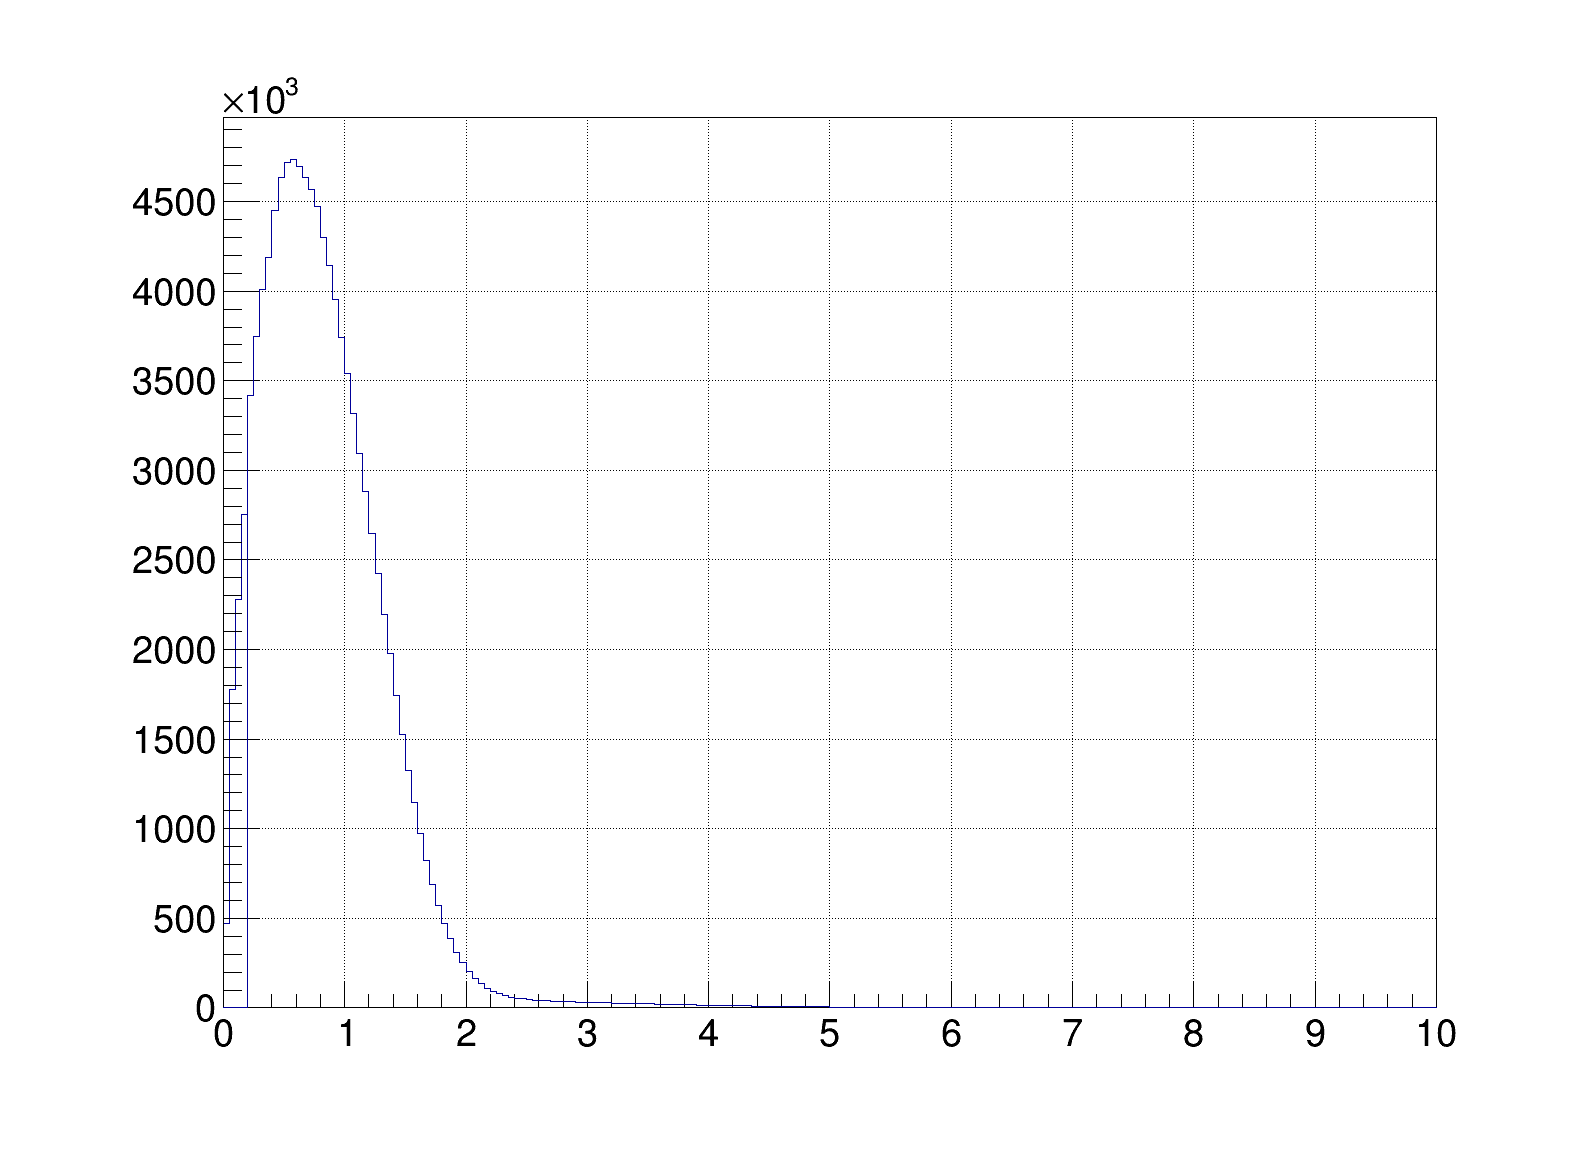

In [19]:
path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
f_flux_int = ROOT.TFile.Open(path_flux+'FF_neutrino_flux.root', 'read')
h_flux_cv = f_flux_int.Get("h_flux_cv")

flux_cv = h_flux_cv.Integral(-1,201)
flux_cv_200 = h_flux_cv.Integral(5,201)
h_flux_cv.Draw()
h_flux_cv_200 = h_flux_cv.Clone()
h_flux_cv_200.SetBinContent(0,0)
h_flux_cv_200.SetBinContent(1,0)
h_flux_cv_200.SetBinContent(2,0)
h_flux_cv_200.SetBinContent(3,0)
h_flux_cv_200.SetBinContent(4,0)
h_flux_cv_200.Draw('same')
flux_cv_t = h_flux_cv_200.Integral(4,201)

print flux_cv, flux_cv_200, flux_cv_t
c1.Draw()

In [ ]:
dsfgdfsg

In [20]:
def return_flux_covar_200(h_true,this_pot):
    # give h_true_cv and POT since bkg is for specific POT
    # BACKGROUND, EFFICIENCY ARE IN ONE FILE, SMEARING IN OTHER...
    path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'

    weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]

    f_flux_int = ROOT.TFile.Open(path_flux+'FF_neutrino_flux.root', 'read')
    f_in = ROOT.TFile.Open(path_flux+'FF_detsys.root', 'read')
    f_flux = ROOT.TFile.Open(path_flux+'FF_flux.root', 'read')

    h_true_cv = h_true.Clone()
    h_bkg_cv = f_flux.Get('h_bkg_flux_cv')
    h_smear_cv = f_flux.Get('h_smear_flux_cv')
    
    NumberOfFiles = 5000
    POT_file = 5e8
    activeVol_Area = 128.175*2*116.5*2
    h_flux_cv = f_flux_int.Get("h_flux_cv")
    flux_cv = h_flux_cv.Integral(5,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot

    h_bkg_cv.Scale(this_pot/7.644e+18)
    
    h_data = f_in.Get('h_data')
    h_ext = f_in.Get('h_ext_cv')
    h_dirt = f_in.Get('h_dirt_cv')
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    
    ext_vec = FF.plot2arr(h_ext,1)
    data_vec = FF.plot2arr(h_data,1)
    dirt_vec = FF.plot2arr(h_dirt,1)
    true_vec = FF.plot2arr(h_true_cv,1)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = FF.plot2arr(h_smear_cv,2)
    bkg_vec = FF.plot2arr(h_bkg_cv,1)

    reco_vec = true_vec.dot(smear_mat)
    
    n_true = h_true.Integral(1,num_bins+1)
    n_sig = np.sum(reco_vec)
    n_data = np.sum(data_vec)
    n_dirt = np.sum(dirt_vec)
    n_ext = np.sum(ext_vec)
    n_bkg = np.sum(bkg_vec)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)

    num_universe = 1000

    bkg_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    reco_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    smear_mat_flux = np.zeros((len(weight_list),num_universe,num_bins,num_bins))
    res_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    tot_diff = np.zeros((len(weight_list),num_universe))
    xsec_diff = np.zeros((len(weight_list),num_universe)) 
    all_flux = np.zeros((len(weight_list),num_universe)) 
    
    h_bkg_flux = []
    h_smear_flux = []
    h_eff_flux = []
    
    for i,x in enumerate(weight_list):
        h_bkg_flux.append([])
        h_smear_flux.append([])
        h_eff_flux.append([])
        print 'Histofilling Parameter: ',i
        for uni in range(num_universe):
            #if(uni%100==0):
            #    print 'Parameter: ',i,' universe: ',uni
            #do something
            h_bkg_flux[i].append(f_flux.Get('h_bkg_flux['+str(i)+']['+str(uni)+']'))
            h_bkg_flux[i][uni].Scale(this_pot/7.644e+18)
            
            h_smear_flux[i].append(f_flux.Get('h_smear_flux['+str(i)+']['+str(uni)+']'))

            h_flux_var = f_flux_int.Get('h_flux_flux['+str(i)+']['+str(uni)+']')
            flux_var = h_flux_var.Integral(5,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot
            
            all_flux[i][uni] = flux_var
            #print flux_cv, flux_var, (flux_var-flux_cv)/flux_var 
            bkg_vec_flux[i][uni] = FF.plot2arr(h_bkg_flux[i][uni],1)
            smear_mat_flux[i][uni] = FF.plot2arr(h_smear_flux[i][uni],2)
            
            reco_vec_flux[i][uni]= true_vec.dot(smear_mat_flux[i][uni])
            res_vec_flux[i][uni] = ((reco_vec+bkg_vec+dirt_vec) - (reco_vec_flux[i][uni] + bkg_vec_flux[i][uni]+dirt_vec)*(flux_var/flux_cv))/((reco_vec+bkg_vec+ext_vec+dirt_vec))
            tot_diff[i][uni] = (np.sum(reco_vec+bkg_vec+dirt_vec) - np.sum(reco_vec_flux[i][uni] + bkg_vec_flux[i][uni]+dirt_vec)*(flux_var/flux_cv))/np.sum((reco_vec+bkg_vec+ext_vec+dirt_vec))
            #tot_diff[i][uni] = (np.sum(reco_vec+bkg_vec+dirt_vec) - np.sum(reco_vec+bkg_vec+dirt_vec)/flux_var*flux_cv)/np.sum((reco_vec+bkg_vec+ext_vec+dirt_vec))
            #print tot_diff[i][uni]*100
            xsec_flux = (n_data-n_ext-n_dirt-np.sum(bkg_vec_flux[i][uni])*flux_var/flux_cv)/((np.sum(reco_vec_flux[i][uni])/n_true)*N_tot*flux_var)
            xsec_diff[i][uni] = (xsec_cv-xsec_flux)/xsec_cv
        
    #print bkg_vec[1], bkg_vec_flux[i][uni][1]
    #print reco_vec[1], reco_vec_flux[i][uni][1]
    frac_covar_flux_vec = np.zeros((len(weight_list),num_bins,num_bins))
    for i,x in enumerate(weight_list):
        print 'covar calculation Parameter: ',i
        for uni in range(num_universe):
            for j in range(num_bins):
                for k in range(num_bins):
                    frac_covar_flux_vec[i][j][k] += res_vec_flux[i][uni][j] * res_vec_flux[i][uni][k]
        frac_covar_flux_vec[i] = frac_covar_flux_vec[i]/num_universe

    frac_covar_flux = np.zeros((num_bins,num_bins))
    for i,x in enumerate(weight_list):
        frac_covar_flux += frac_covar_flux_vec[i]
    print 'Finished'
    return frac_covar_flux,tot_diff,xsec_diff,all_flux



In [21]:
def return_crt_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_crt = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_crt = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = h_true.Clone()
    h_bkg_crt = h_true.Clone()
    
    h_dirt_cv = h_true.Clone()
    h_dirt_crt = h_true.Clone()
    h_ext = h_true.Clone()
    h_data = ROOT.TH1F('h_data',"Cosmic",43,0,43)

    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_crt.Get('h_overlay['+str(t_bin)+']')
        h_temp1 = f_crt.Get('h_overlay_nocrt['+str(t_bin)+']')
        h_temp2 = f_crt.Get('h_dirt['+str(t_bin)+']')
        h_temp3 = f_crt.Get('h_dirt_nocrt['+str(t_bin)+']')
        h_temp4 = f_crt.Get('h_ext['+str(t_bin)+']')
        h_tempdata = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            h_bkg_crt.SetBinContent(bin_counter,h_temp1.GetBinContent(m_bin+1))
            h_dirt_cv.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
            h_dirt_crt.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_data.SetBinContent(bin_counter,h_tempdata.GetBinContent(m_bin+1))
    
    h_bkg_cv.Scale(this_pot/2.144e+20)
    h_bkg_crt.Scale(this_pot/2.144e+20)
    h_dirt_cv.Scale(this_pot/2.144e+20)
    h_dirt_crt.Scale(this_pot/2.144e+20)
    h_ext.Scale(this_pot/2.144e+20)
    h_data.Scale(this_pot/2.144e+20)
    
    h_smear_cv = f_crt.Get('h_smearing')
    h_smear_crt = f_crt.Get('h_smearing_nocrt')
    
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    smear_mat_crt = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    data_vec = np.zeros((num_bins))
    
    bkg_vec_crt = np.zeros((num_bins))
    dirt_vec_crt = np.zeros((num_bins))
    
    tot_diff = 0

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        dirt_vec[i] = h_dirt_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        data_vec[i] = h_data.GetBinContent(i+1)

        bkg_vec_crt[i] = h_bkg_crt.GetBinContent(i+1)
        dirt_vec_crt[i] = h_dirt_crt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
            smear_mat_crt[i][j]= h_smear_crt.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)
    reco_vec_crt = true_vec.dot(smear_mat_crt)
    
    #bkg_vec_det = bkg_vec - bkg_vec_crt*0.1
    #dirt_vec_det = dirt_vec - dirt_vec_crt*0.1
    #reco_vec_det = reco_vec - reco_vec_crt*0.1
    delta = bkg_vec+dirt_vec+reco_vec - (bkg_vec_crt+dirt_vec_crt+reco_vec_crt)
    
    delta = delta*0.1
    tot = bkg_vec+dirt_vec+reco_vec+ext_vec
    
    n_true = h_true.Integral(1,num_bins+1)
    n_sig = np.sum(reco_vec)
    n_data = np.sum(data_vec)
    n_dirt = np.sum(dirt_vec)
    n_ext = np.sum(ext_vec)
    n_bkg = np.sum(bkg_vec)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)
    xsec_crt = (n_data-n_ext-n_dirt-np.sum(bkg_vec-(bkg_vec-bkg_vec-bkg_vec_crt)*0.1))/((np.sum(reco_vec-(reco_vec-reco_vec_crt)*0.1)/n_true)*N_tot*flux_cv)
    xsec_diff = (xsec_cv - xsec_crt)/xsec_cv
    tot_diff = (np.sum(delta))/np.sum((reco_vec+bkg_vec+ext_vec+dirt_vec))
    #print tot_diff*100
    
    frac_covar_det = np.zeros((num_bins,num_bins))
    for i in range(num_bins):
        for j in range(num_bins):
            frac_covar_det[i][j] = (delta[i]*delta[j])/(tot[i]*tot[j])
            
    return frac_covar_det,tot_diff,xsec_diff

In [22]:
def return_stat_covar(h_histo):
    n_bins = h_histo.GetNbinsX()
    frac_covar_stat = np.zeros((n_bins,n_bins))
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        err = h_histo.GetBinError(i+1)
        val = h_histo.GetBinContent(i+1)
        #print err ,val
        frac_covar_stat[i][i] = err*err / (val*val)
    tot_diff = 1.0/math.sqrt(h_histo.Integral(-1,n_bins+1))
    
    
    return frac_covar_stat,tot_diff

In [23]:
def return_dirt_covar(h_true, h_bkg, h_ext, h_dirt,h_data):
    n_bins = h_true.GetNbinsX()
    frac_covar_dirt = np.zeros((n_bins,n_bins))
    
    h_all = h_true.Clone()
    h_all = smear_plot(h_all)
    reco_vec = FF.plot2arr(h_all,1)
    h_all.Add(h_bkg)
    h_all.Add(h_ext)
    h_all.Add(h_dirt)
    
    all_vec = FF.plot2arr(h_all,1)
    dirt_vec = FF.plot2arr(h_dirt,1)
    
    tot_diff = 0
    tot_diff = np.sum(dirt_vec)/np.sum(all_vec)
    
    n_data = h_data.Integral(-1,n_bins+1)
    n_ext = h_ext.Integral(-1,n_bins+1)
    n_dirt = h_dirt.Integral(-1,n_bins+1)
    n_bkg = h_bkg.Integral(-1,n_bins+1)
    n_sig = np.sum(reco_vec)
    n_true = h_true.Integral(-1,n_bins+1)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)
    xsec_dirt = (n_data-n_ext-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)
    xsec_diff = (xsec_cv-xsec_dirt)/xsec_cv
    
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        for j in range(n_bins):
            #print all_vec[i], dirt_vec[i]
            frac_covar_dirt[i][j] = (dirt_vec[i])*(dirt_vec[j])/(all_vec[i]*all_vec[j])
    
    
    return frac_covar_dirt,tot_diff,xsec_diff

In [24]:
def return_pot_covar(h_true, h_bkg, h_ext, h_dirt,h_data):
    n_bins = 43#h_true.GetNbinsX()
    frac_covar_dirt = np.zeros((n_bins,n_bins))
    
    h_all = h_true.Clone()
    h_all = smear_plot(h_all)
    reco_vec = FF.plot2arr(h_all,1)
    h_all.Add(h_bkg)
    h_all.Add(h_dirt)
    
    pot_vec = FF.plot2arr(h_all,1)
    
    h_all.Add(h_ext)
    all_vec = FF.plot2arr(h_all,1)
    
    tot_diff = 0
    tot_diff = np.sum(pot_vec)*0.02/np.sum(all_vec)
    
    n_data = h_data.Integral(-1,n_bins+1)
    n_ext = h_ext.Integral(-1,n_bins+1)
    n_dirt = h_dirt.Integral(-1,n_bins+1)
    n_bkg = h_bkg.Integral(-1,n_bins+1)
    n_sig = np.sum(reco_vec)
    n_true = h_true.Integral(-1,n_bins+1)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)
    xsec_pot = (n_data-n_ext-(n_dirt+n_bkg)*1.02)/((n_sig/n_true)*N_tot*flux_cv*1.02)
    xsec_diff = (xsec_cv-xsec_pot)/xsec_cv
    
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        for j in range(n_bins):
            #print all_vec[i], dirt_vec[i]
            frac_covar_dirt[i][j] = (pot_vec[i]*0.02)*(pot_vec[j]*0.02)/(all_vec[i]*all_vec[j])
    
    
    return frac_covar_dirt, tot_diff,xsec_diff

In [25]:
def eventrate_comparison(h_data_func,h_ext_func,h_dirt_func,h_bkg_func,h_true_func,this_frac_tot, filename,model_name):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    c1.cd()

    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)

    FF.main_plot(h_data_func)
    
    h_reco_func = smear_plot(h_true_func)

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    h_tot.Add(h_bkg_func)
    
    num_bins = 43 # get eventually better than hardcode
    #pred_vec = FF.plot2arr(h_tot,1)
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func,1)
    dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot,1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    
    #get covar on all
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar[i][j] = this_frac_tot[i][j]*pred_vec[i]*pred_vec[j]
    
    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
        
    # get dirt uncertainty (100%)
    #covar_dirt = np.zeros((num_bins-1,num_bins-1))
    #pred_vec_all = FF.plot2arr(h_tot,1)
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar_dirt[i][j] = frac_dirt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    # get crt uncertainty
    #covar_crt = np.zeros((num_bins-1,num_bins-1))
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar_crt[i][j] = frac_crt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    
    #covar+=covar_data+covar_dirt+covar_crt
    #inv_covar = sla.inv(covar,check_finite=False)
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    #chi2_tmp = diff_vec.dot(inv_covar)
    #chi2 = chi2_tmp.dot(diff_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    #print 'Data: ',dat_vec
    #print 'pred: ',tot_vec
    #print 'diff: ',diff_vec
    #print 'covar: ',covar
    #print 'inv covar: ',inv_covar
    #print chi2_tmp, chi2_tmp.shape
    print 'Chi2 = ',chi2
    h_data_func.SetMaximum(-1111)
    h_data_func.SetMaximum(h_data_func.GetMaximum()*1.2)
    h_data_func.Draw('E1')
    h_histo = FF.histBkg(h_true_func)
    h_histo.Draw('hist same')
    hs.Draw('same hist')
    h_tot.Draw('same E2')
    
    legend = ROOT.TLegend(0.15,0.65,0.5,0.9)
    legend.AddEntry(h_data_func,'Data + stat.',"lep");
    legend.AddEntry(h_tot,model_name+' + bkg: #chi^{2}:'+'{:04.1f}'.format(chi2),"f");
    #legend.AddEntry(h_tot,'Syst. error, #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    legend.Draw()
    
    h_data_func.Draw('E1 same')

    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()

    h_data_func.GetYaxis().SetTitleOffset(1);
    h_data_func.GetXaxis().SetLabelOffset(999);
    h_data_func.GetXaxis().SetTitleOffset(999);
    h_data_func.GetXaxis().SetLabelSize(0);
    h_data_func.GetXaxis().SetTitleSize(0);
    
    c1.cd()
    h_data_func.GetXaxis().SetLabelOffset(0);
    h_data_func.GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_tot_noerr = h_tot.Clone()
    for i in range(43):
        h_tot_noerr.SetBinError(i,0)
    h_xsec_data_ratio = h_data_func.Clone()
    h_xsec_data_ratio.Divide(h_tot_noerr)
    h_mc_ratio = h_tot.Clone()
    h_mc_ratio.Divide(h_tot_noerr)

    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
    h_xsec_data_ratio.SetMaximum(2)
    h_xsec_data_ratio.Draw('E1')
    h_histo.Draw('hist same')
    h_mc_ratio.Draw('E2 same')

    c1.Draw()
    c1.SaveAs(outputdir_png + filename+".png")
    c1.SaveAs(outputdir_root + filename+".root")
    c1.SaveAs(outputdir_pdf + filename+".pdf")

    return


In [26]:
def xsec2rate(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*(bin_width*bin_width_theta))
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    h_rate.Scale(N_tot*flux_cv)
    return h_rate

In [27]:
def xsec2rate_reco(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*1e-1*(bin_width*bin_width_theta))
    h_rate.Scale(N_tot*flux_cv*1e-38)
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    return h_rate

In [28]:
print N_tot, flux_cv


4.10331109202e+31 110078624.0


# up to here only functions....

In [29]:
# load all distributions and the Genie 3 tuned true
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
h_true_g3_tune = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_sig = ROOT.TH1F('h_sig',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
h_eff = ROOT.TH1F('h_eff',"Cosmic",43,0,43)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_true['+str(t_bin)+']')
    h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
    h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
    h_temp31 = f_cv.Get('h_signal['+str(t_bin)+']')
    h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
    h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
    h_temp6 = f_cv.Get('h_1d_eff['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_true_g3_tune.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_bkg.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_sig.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
        h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
        h_eff.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))
h_eff.SetBinContent(5,1)
h_eff.SetBinContent(10,1)

f = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'+'FF_detsys.root', 'read')
h_true_g3_tune = f.Get('h_gen_cv')

In [30]:
path_chan = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_chan = ROOT.TFile.Open(path_chan+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
#h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_qe = ROOT.TH1F('h_qe',"qe",43,0,43)
h_mec = ROOT.TH1F('h_mec',"mec",43,0,43)
h_res = ROOT.TH1F('h_res',"res",43,0,43)
h_dis = ROOT.TH1F('h_dis',"dis",43,0,43)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_chan.Get('h_QE['+str(t_bin)+']')
    h_temp2 = f_chan.Get('h_MEC['+str(t_bin)+']')
    h_temp3 = f_chan.Get('h_RES['+str(t_bin)+']')
    h_temp31 = f_chan.Get('h_DIS['+str(t_bin)+']')
    #h_temp6 = f_cv.Get('h_data['+str(t_bin)+']')

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_qe.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_mec.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_res.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_dis.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        #h_data.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))


h_rate_qe = xsec2rate_reco(h_qe)
h_rate_mec = xsec2rate_reco(h_mec)
h_rate_res = xsec2rate_reco(h_res)
h_rate_dis = xsec2rate_reco(h_dis)

h_rate_qe = smear_plot(h_rate_qe)
h_rate_mec = smear_plot(h_rate_mec)
h_rate_res = smear_plot(h_rate_res)
h_rate_dis = smear_plot(h_rate_dis)


Warning in <TFile::Append>: Replacing existing TH1: h_rate (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_rate (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_rate (Potential memory leak).


In [31]:
f_gen = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'+"FF_generators.root", 'read')

h_rate_g3 = f_gen.Get('h_rate_g3')
h_rate_g2 = f_gen.Get('h_rate_g2')
h_rate_gibuu = f_gen.Get('h_rate_gibuu')
h_rate_nuwro = f_gen.Get('h_rate_nuwro')
h_rate_neut = f_gen.Get('h_rate_neut')

In [32]:
n_bins = 43
n_data = h_data.Integral(-1,n_bins+1)
n_ext = h_ext.Integral(-1,n_bins+1)
n_dirt = h_dirt.Integral(-1,n_bins+1)
n_bkg = h_bkg.Integral(-1,n_bins+1)
n_sig = h_sig.Integral(-1,n_bins+1)
n_true = h_true_g3_tune.Integral(-1,n_bins+1)
xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)
xsec_stat = (n_data+math.sqrt(n_data)-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)
#xsec_diff = (xsec_cv-xsec_pot)/xsec_cv
xsec_diff_stat = (xsec_cv-xsec_stat)/xsec_cv
frac_statxsec = abs(xsec_diff_stat)*100#,xsec_cv
print frac_statxsec

0.705456510997


In [33]:
pot = 2.144e+20

h_this_true = h_true_g3_tune.Clone()

h_this_pred = h_this_true.Clone()
h_this_pred = smear_plot(h_this_pred)
h_this_pred.Add(h_bkg)
h_this_pred.Add(h_dirt)
h_this_pred.Add(h_ext)


#frac_det,tot_sys,xsec_det = return_detsys_covar(h_this_true,pot)
#np.save(outputdir+'frac_det',frac_det)
#frac_other,tot_other, xsec_other = return_other_covar(h_this_true,pot)
#np.save(outputdir+'frac_other',frac_other)
#frac_all,tot_all,xsec_all = return_all_covar(h_this_true,pot)
#np.save(outputdir+'frac_all',frac_all)
frac_flux_200,tot_flux_200,xsec_flux_200,all_flux_200 = return_flux_covar_200(h_this_true,pot)
np.save(outputdir+'frac_flux_200',frac_flux_200)
#frac_crt,tot_crt,xsec_crt =  return_crt_covar(h_this_true,2.144e+20)
#np.save(outputdir+'frac_crt',frac_crt)
#frac_stat,tot_stat = return_stat_covar(h_this_pred)
#np.save(outputdir+'frac_stat',frac_stat)
#frac_dirt,tot_dirt,xsec_dirt = return_dirt_covar(h_this_true,h_bkg,h_ext,h_dirt,h_data)
#np.save(outputdir+'frac_dirt',frac_dirt)
#frac_pot,tot_pot,xsec_pot = return_pot_covar(h_this_true,h_bkg,h_ext,h_dirt,h_data)
#np.save(outputdir+'frac_pot',frac_pot)

#frac_tot = frac_det+frac_other+frac_all+frac_flux+frac_crt+frac_dirt+frac_stat+frac_pot
#np.save(outputdir+'frac_tot',frac_tot)
'''
np.save(outputdir+'tot_sys',tot_sys)
np.save(outputdir+'tot_other',tot_other)
np.save(outputdir+'tot_all',tot_all)
np.save(outputdir+'tot_flux',tot_flux)
np.save(outputdir+'tot_crt',tot_crt)
np.save(outputdir+'tot_stat',tot_stat)
np.save(outputdir+'tot_dirt',tot_dirt)
np.save(outputdir+'tot_pot',tot_pot)

np.save(outputdir+'xsec_det',xsec_det)
np.save(outputdir+'xsec_other',xsec_other)
np.save(outputdir+'xsec_all',xsec_all)
np.save(outputdir+'xsec_flux',xsec_flux)
np.save(outputdir+'xsec_crt',xsec_crt)
np.save(outputdir+'xsec_dirt',xsec_dirt)
np.save(outputdir+'xsec_pot',xsec_pot)
'''

frac_det = np.load(outputdir+'frac_det.npy')
frac_other = np.load(outputdir+'frac_other.npy')
frac_all = np.load(outputdir+'frac_all.npy')
frac_flux = np.load(outputdir+'frac_flux.npy')
frac_crt = np.load(outputdir+'frac_crt.npy')
frac_dirt = np.load(outputdir+'frac_dirt.npy')
frac_pot = np.load(outputdir+'frac_pot.npy')
frac_tot = np.load(outputdir+'frac_tot.npy')

'''tot_sys = np.load(outputdir+'tot_sys.npy')
tot_other = np.load(outputdir+'tot_other.npy')
frac_all = np.load(outputdir+'frac_all.npy')
frac_flux = np.load(outputdir+'frac_flux.npy')
frac_crt = np.load(outputdir+'frac_crt.npy')
frac_dirt = np.load(outputdir+'frac_dirt.npy')
frac_pot = np.load(outputdir+'frac_pot.npy')
frac_tot = np.load(outputdir+'frac_tot.npy')

frac_det = np.load(outputdir+'frac_det.npy')
frac_other = np.load(outputdir+'frac_other.npy')
frac_all = np.load(outputdir+'frac_all.npy')
frac_flux = np.load(outputdir+'frac_flux.npy')
frac_crt = np.load(outputdir+'frac_crt.npy')
frac_dirt = np.load(outputdir+'frac_dirt.npy')
frac_pot = np.load(outputdir+'frac_pot.npy')
frac_tot = np.load(outputdir+'frac_tot.npy')'''


Histofilling Parameter:  0
Histofilling Parameter:  1
Histofilling Parameter:  2
Histofilling Parameter:  3
Histofilling Parameter:  4
Histofilling Parameter:  5
Histofilling Parameter:  6
Histofilling Parameter:  7
Histofilling Parameter:  8
Histofilling Parameter:  9
Histofilling Parameter:  10
Histofilling Parameter:  11
Histofilling Parameter:  12
covar calculation Parameter:  0
covar calculation Parameter:  1
covar calculation Parameter:  2
covar calculation Parameter:  3
covar calculation Parameter:  4
covar calculation Parameter:  5
covar calculation Parameter:  6
covar calculation Parameter:  7
covar calculation Parameter:  8
covar calculation Parameter:  9
covar calculation Parameter:  10
covar calculation Parameter:  11
covar calculation Parameter:  12
Finished


"tot_sys = np.load(outputdir+'tot_sys.npy')\ntot_other = np.load(outputdir+'tot_other.npy')\nfrac_all = np.load(outputdir+'frac_all.npy')\nfrac_flux = np.load(outputdir+'frac_flux.npy')\nfrac_crt = np.load(outputdir+'frac_crt.npy')\nfrac_dirt = np.load(outputdir+'frac_dirt.npy')\nfrac_pot = np.load(outputdir+'frac_pot.npy')\nfrac_tot = np.load(outputdir+'frac_tot.npy')\n\nfrac_det = np.load(outputdir+'frac_det.npy')\nfrac_other = np.load(outputdir+'frac_other.npy')\nfrac_all = np.load(outputdir+'frac_all.npy')\nfrac_flux = np.load(outputdir+'frac_flux.npy')\nfrac_crt = np.load(outputdir+'frac_crt.npy')\nfrac_dirt = np.load(outputdir+'frac_dirt.npy')\nfrac_pot = np.load(outputdir+'frac_pot.npy')\nfrac_tot = np.load(outputdir+'frac_tot.npy')"

In [36]:
frac_flux,tot_flux,xsec_flux,all_flux = return_flux_covar(h_this_true,pot)
#np.save(outputdir+'frac_flux_200',frac_flux_200)

Histofilling Parameter:  0
Histofilling Parameter:  1
Histofilling Parameter:  2
Histofilling Parameter:  3
Histofilling Parameter:  4
Histofilling Parameter:  5
Histofilling Parameter:  6
Histofilling Parameter:  7
Histofilling Parameter:  8
Histofilling Parameter:  9
Histofilling Parameter:  10
Histofilling Parameter:  11
Histofilling Parameter:  12
covar calculation Parameter:  0
covar calculation Parameter:  1
covar calculation Parameter:  2
covar calculation Parameter:  3
covar calculation Parameter:  4
covar calculation Parameter:  5
covar calculation Parameter:  6
covar calculation Parameter:  7
covar calculation Parameter:  8
covar calculation Parameter:  9
covar calculation Parameter:  10
covar calculation Parameter:  11
covar calculation Parameter:  12
Finished


In [ ]:
#print tot_sys*100
para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
#print xsec_det
for i in range(len(para)):
    print para[i],' : ', tot_sys[i]*100
#print ''
#print frac_det

In [73]:
# flux uncertainty on event rate
sigma = np.zeros((13))
this1 = np.zeros((13))
tot1 = 0
sigmax = np.zeros((13))
this1x = np.zeros((13))
tot1x = 0
for i in range(13):
    for uni in range (1000):
        sigma[i] += tot_flux[i][uni]**2
        sigmax[i] += xsec_flux[i][uni]**2
    this1[i] = math.sqrt(sigma[i]/1000)#/flux_cv
    this1x[i] = math.sqrt(sigmax[i]/1000)#/flux_cv
    #print this1[i]
    #print this1x[i]
    tot1+= this1[i]**2
    tot1x+= this1x[i]**2
print math.sqrt(tot1)
print math.sqrt(tot1x)
frac_fluxsys = math.sqrt(tot1)*100
frac_fluxxsecsys = math.sqrt(tot1x)*100

0.1113094472
0.128675714948


In [74]:
weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]
print 'Flux uncertainty using all neutrino energies'
for i in range(13):
    #'Beam flux = {:.5e}'.format(beam_flux),
    print '{:45s}'.format(weight_list[i])+': {:.3f}%'.format(this1x[i]*100)
print '{:45s}'.format('Total (added in quadrature)')+': {:.3f}%'.format(frac_fluxxsecsys)

Flux uncertainty using all neutrino energies
expskin_FluxUnisim                           : 3.549%
horncurrent_FluxUnisim                       : 0.595%
kminus_PrimaryHadronNormalization            : 0.010%
kplus_PrimaryHadronFeynmanScaling            : 0.248%
kzero_PrimaryHadronSanfordWang               : 0.047%
nucleoninexsec_FluxUnisim                    : 1.109%
nucleonqexsec_FluxUnisim                     : 3.177%
nucleontotxsec_FluxUnisim                    : 0.949%
piminus_PrimaryHadronSWCentralSplineVariation: 0.131%
pioninexsec_FluxUnisim                       : 1.333%
pionqexsec_FluxUnisim                        : 0.911%
piontotxsec_FluxUnisim                       : 0.866%
piplus_PrimaryHadronSWCentralSplineVariation : 11.703%
Total (added in quadrature)                  : 12.868%


In [75]:
# flux uncertainty on event rate
sigma = np.zeros((13))
this1 = np.zeros((13))
tot1 = 0
sigmax = np.zeros((13))
this1x = np.zeros((13))
tot1x = 0
for i in range(13):
    for uni in range (1000):
        sigma[i] += tot_flux_200[i][uni]**2
        sigmax[i] += xsec_flux_200[i][uni]**2
    this1[i] = math.sqrt(sigma[i]/1000)#/flux_cv
    this1x[i] = math.sqrt(sigmax[i]/1000)#/flux_cv
    #print this1[i]
    #print this1x[i]
    tot1+= this1[i]**2
    tot1x+= this1x[i]**2
print math.sqrt(tot1)
print math.sqrt(tot1x)
frac_fluxsys = math.sqrt(tot1)*100
frac_fluxxsecsys = math.sqrt(tot1x)*100

0.0785965299344
0.0957375455318


In [77]:
weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]
print 'Flux uncertainty using >200 MeV neutrino energies'
for i in range(13):
    #'Beam flux = {:.5e}'.format(beam_flux),
    print '{:45s}'.format(weight_list[i])+': {:.3f}%'.format(this1x[i]*100)
print '{:45s}'.format('Total (added in quadrature)')+': {:.3f}%'.format(frac_fluxxsecsys)

Flux uncertainty using >200 MeV neutrino energies
expskin_FluxUnisim                           : 3.774%
horncurrent_FluxUnisim                       : 0.629%
kminus_PrimaryHadronNormalization            : 0.009%
kplus_PrimaryHadronFeynmanScaling            : 0.257%
kzero_PrimaryHadronSanfordWang               : 0.041%
nucleoninexsec_FluxUnisim                    : 1.124%
nucleonqexsec_FluxUnisim                     : 3.168%
nucleontotxsec_FluxUnisim                    : 1.016%
piminus_PrimaryHadronSWCentralSplineVariation: 0.138%
pioninexsec_FluxUnisim                       : 1.419%
pionqexsec_FluxUnisim                        : 0.995%
piontotxsec_FluxUnisim                       : 0.910%
piplus_PrimaryHadronSWCentralSplineVariation : 7.795%
Total (added in quadrature)                  : 9.574%


In [38]:
# only flux uncertainty, 1000 universe
sigma = np.zeros((13))
tot = 0
for i in range(13):
    for uni in range (1000):
        sigma[i] += (flux_total_all[i][uni]-flux_cv)**2
    this = math.sqrt(sigma[i]/1000)/flux_cv
    #print this
    tot+= this**2
print math.sqrt(tot)

5216.66858051


In [39]:
# flux uncertainty on event rate
sigma = np.zeros((13))
this1 = np.zeros((13))
tot1 = 0
for i in range(13):
    for uni in range (1000):
        sigma[i] += tot_flux[i][uni]**2
    this1[i] = math.sqrt(sigma[i]/1000)#/flux_cv
    #print this1[i]
    tot1+= this1[i]**2
print math.sqrt(tot1)

0.1113094472


In [40]:
# flux uncertainty on cross section
sigma = np.zeros((13))
this = np.zeros((13))
tot = 0
for i in range(13):
    for uni in range (1000):
        sigma[i] += xsec_flux[i][uni]**2
    this[i] = math.sqrt(sigma[i]/1000)#/flux_cv
    #print this[i]
    tot+= this[i]**2
print math.sqrt(tot)

0.128675714948


In [ ]:
#print tot_crt,xsec_crt
frac_crtsys = abs(tot_crt)*100
frac_crtxsec = abs(xsec_crt)*100
print 'Total crt uncertainty rate: ', abs(tot_crt)*100
print 'Total crt uncertainty xsec: ', abs(xsec_crt)*100
#print xsec_dirt
frac_dirtsys = abs(tot_dirt)*100
frac_dirtxsec = abs(xsec_dirt)*100
print 'Total dirt uncertainty rate: ', abs(tot_dirt)*100
print 'Total dirt uncertainty xsec: ', abs(xsec_dirt)*100
# pot sus
frac_potsys = abs(tot_pot)*100
frac_potxsec = abs(xsec_pot)*100
print 'Total pot uncertainty rate: ', abs(tot_pot)*100
print 'Total pot uncertainty xsec: ', abs(xsec_pot)*100

In [ ]:
# all Genie sys
frac_allsys = np.sum(np.absolute(tot_all)*100)/600
frac_xsecsys = np.sum(np.absolute(xsec_all)*100)/600
#print frac_allsys, frac_xsecsys
print 'Total AllGenie uncertainty rate: ', frac_allsys
print 'Total AllGenie uncertainty xsec: ', frac_xsecsys

In [ ]:
#other genie sys
#print tot_other
#print xsec_other
frac_othersys = math.sqrt(np.sum(tot_other*tot_other*100*100))
frac_otherxsec = math.sqrt(np.sum(xsec_other*xsec_other*100*100))
#print frac_othersys, frac_otherxsec

print 'Total other Genie uncertainty rate: ', frac_othersys
print 'Total other Genie uncertainty xsec: ', frac_otherxsec

In [ ]:
#det sys
print tot_sys*100
#print xsec_det
frac_detsys = math.sqrt(np.sum(tot_sys*tot_sys*100*100))
frac_detxsec = math.sqrt(np.sum(xsec_det*xsec_det*100*100))
#print frac_detsys, frac_detxsec

print 'Total detector uncertainty rate: ', frac_detsys
print 'Total detector uncertainty xsec: ', frac_detxsec

In [41]:
# total event rate
frac_statsys = tot_stat*100#,frac_stat

print 'Total detector uncertainty rate: ', frac_detsys
print 'Total AllGenie uncertainty rate: ', frac_allsys
print 'Total other Genie uncertainty rate: ', frac_othersys
print 'Total Genie uncertainty rate: ', math.sqrt(frac_allsys**2+frac_othersys**2)

print 'Total crt uncertainty rate: ', frac_crtsys
print 'Total dirt uncertainty rate: ', frac_dirtsys
print 'Total pot uncertainty rate: ', frac_potsys
print 'Total flux eventrate uncertainty: ',frac_fluxsys
print 'Total stat eventrate uncertainty: ',frac_statsys

tot_frac_sys = math.sqrt(frac_detsys*frac_detsys+frac_othersys*frac_othersys+frac_allsys*frac_allsys\
            +frac_crtsys*frac_crtsys+frac_statsys*frac_statsys+frac_dirtsys*frac_dirtsys\
            +frac_fluxsys*frac_fluxsys+frac_potsys*frac_potsys)
print 'Total uncertainty event rate: ',tot_frac_sys

NameError: name 'tot_stat' is not defined

In [ ]:
print 'Total detector uncertainty xsec: ', frac_detxsec
print 'Total AllGenie uncertainty xsec: ', frac_xsecsys
print 'Total other Genie uncertainty xsec: ', frac_otherxsec
print 'Total Genie uncertainty xsec: ', math.sqrt(frac_otherxsec**2+frac_xsecsys**2)
print 'Total crt uncertainty xsec: ', frac_crtxsec
print 'Total dirt uncertainty xsec: ', frac_dirtxsec
print 'Total pot uncertainty xsec: ', frac_potxsec
print 'Total flux xsec uncertainty: ',frac_fluxxsecsys
print 'Total stat xsec uncertainty: ',frac_statxsec

 
tot_frac_sys = math.sqrt(frac_detxsec*frac_detxsec+frac_otherxsec*frac_otherxsec+frac_xsecsys*frac_xsecsys\
            +frac_crtxsec*frac_crtxsec+frac_statxsec*frac_statxsec+frac_dirtxsec*frac_dirtxsec\
            +frac_fluxxsecsys*frac_fluxxsecsys+frac_potxsec*frac_potxsec)
print 'Total uncertainty xsec: ', tot_frac_sys

In [ ]:
h_this_true.GetYaxis().SetTitleSize(0.05)
h_this_true.GetYaxis().SetTitleOffset(0.0)
h_this_true.GetYaxis().SetLabelSize(0.05)
h_this_true.GetXaxis().SetTitleSize(0.05)
h_this_true.GetXaxis().SetLabelSize(0.05)
h_this_true.GetXaxis().SetTitleOffset(1)
h_this_true.SetLineColor(ROOT.kGreen-1)
h_this_true.SetLineWidth(2)
ROOT.gStyle.SetEndErrorSize(5)

h_this_true.SetXTitle('True bin i')
h_this_true.SetYTitle('Number of Event')

legend = ROOT.TLegend(0.15,0.7,0.5,0.9) # LEGEND LEFT
#legend.SetNColumns(2)
legend.AddEntry(h_this_true,"True event rate","lep");

h_ = FF.histBkg(h_this_true)
h_this_true.Draw('hist')
h_.Draw('same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_true.png")
c1.SaveAs(outputdir_root + "h_true.root")
c1.SaveAs(outputdir_pdf + "h_true.pdf")

In [ ]:
'''h_rate_g3 = xsec2rate(h_xsec_g3)
h_rate_g2 = xsec2rate(h_xsec_g2)
h_rate_gibuu = xsec2rate(h_xsec_gibuu)
h_rate_neut = xsec2rate(h_xsec_neut)
h_rate_nuwro = xsec2rate(h_xsec_nuwro)'''
xsec_MC_g2 = (h_rate_g2.Integral(0,43))/(N_tot * flux_cv)*1e38
xsec_MC_g3 = (h_rate_g3.Integral(0,43))/(N_tot * flux_cv)*1e38
xsec_MC_gibuu = (h_rate_gibuu.Integral(0,43))/(N_tot * flux_cv)*1e38
xsec_MC_neut = (h_rate_neut.Integral(0,43))/(N_tot * flux_cv)*1e38
xsec_MC_nuwro = (h_rate_nuwro.Integral(0,43))/(N_tot * flux_cv)*1e38

print 'G2: ',xsec_MC_g2
print 'G3: ',xsec_MC_g3
print 'Gibuu: ',xsec_MC_gibuu
print 'neut: ',xsec_MC_neut
print 'Nuwro: ',xsec_MC_nuwro

xsec_MC_g3_tune = (h_this_true.Integral(0,43))/(N_tot * flux_cv)*1e38
print 'G3 tune: ',xsec_MC_g3_tune


In [ ]:
n_signal = smear_plot(h_this_true).Integral(0,43)
n_true = h_this_true.Integral(0,43)
print n_signal,n_true,n_signal/n_true

In [ ]:
print h_this_pred.Integral(0,44)
print h_data.Integral(0,44)
n_data = h_data.Integral(0,44)
n_ext = h_ext.Integral(0,44)
n_dirt = h_dirt.Integral(0,44)
n_bkg = h_bkg.Integral(0,44)
n_signal = smear_plot(h_this_true).Integral(0,44)
n_signal2 = h_sig.Integral(0,44)
print n_signal,n_signal2
xsec = (n_data - (n_ext + n_dirt + n_bkg))/(N_tot * flux_cv * 0.5562)
xsec1 = (38351 - (4092.76 + 890.39 + 5604.33))/(N_tot * flux_cv * 0.5562) #27280.42

xsec_MC = (n_signal2)/(N_tot * flux_cv * 0.5562)
xsec_MC1 = (27280.42)/(N_tot * flux_cv * 0.5562)
print xsec,xsec1, xsec_MC,xsec_MC1

In [ ]:
h_tot_xsec = ROOT.TH1F('h_tot_xsec','h_tot_xsec',1,0,1)
c1.SetRightMargin(0.05)
xsec_mcc9 = 7.69680665029e-39*1e38
stat_err_9 = xsec_mcc9*0.0071
sys_err_9_frac = 0.146974075306 #stat+sys
sys_err_9 = xsec_mcc9*sys_err_9_frac

c1.SetGridy(0)
xsec_mcc8 = 0.693e-38*1e38
stat_err_8 = 0.010e-38*1e38
sys_err_8 = 0.165e-38*1e38
h_tot_xsec.SetBinContent(1,xsec_mcc9)
h_tot_xsec.SetBinError(1,sys_err_9 )
h_tot_xsec.SetBinContent(2,xsec_mcc8)
h_tot_xsec.SetBinError(2,math.sqrt(stat_err_8*stat_err_8+sys_err_8*sys_err_8) )
h_tot_xsec.SetLineColor(ROOT.kBlack), h_tot_xsec.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
h_tot_xsec_stat = h_tot_xsec.Clone()
h_tot_xsec_stat.SetBinError(1,stat_err_9 )
h_tot_xsec_stat.SetBinError(2,stat_err_8 )
h_tot_xsec_stat.SetLineColor(ROOT.kRed+2)

h_tot_xsec_sys = h_tot_xsec.Clone()
h_tot_xsec_sys.SetBinError(1,sys_err_9 )
h_tot_xsec_sys.SetBinError(2,sys_err_8 )
h_tot_xsec_sys.SetLineColor(ROOT.kBlue+2)

h_tot_MC = ROOT.TH1F('h_tot_MC','h_tot_MC',2,0,1)
xsec_MC_9 = xsec_MC1*1e38
xsec_MC_8 = 0.871
h_tot_MC.SetBinContent(1,xsec_MC_9)
h_tot_MC.SetBinContent(2,xsec_MC_9)
h_tot_MC_8 = ROOT.TH1F('h_tot_MC_8','h_tot_MC_8',2,0,1)
h_tot_MC_8.SetBinContent(1,xsec_MC_8)
h_tot_MC_8.SetBinContent(2,xsec_MC_8)

h_tot_MC_g2 = ROOT.TH1F('h_tot_MC_g2','h_tot_MC_g2',2,0,1)
h_tot_MC_g2.SetBinContent(1,xsec_MC_g2)
h_tot_MC_g2.SetBinContent(2,xsec_MC_g2)

h_tot_MC_g3 = ROOT.TH1F('h_tot_MC_g3','h_tot_MC_g3',2,0,1)
h_tot_MC_g3.SetBinContent(1,xsec_MC_g3)
h_tot_MC_g3.SetBinContent(2,xsec_MC_g3)

h_tot_MC_gibuu = ROOT.TH1F('h_tot_MC_gibuu','h_tot_MC_gibuu',2,0,1)
h_tot_MC_gibuu.SetBinContent(1,xsec_MC_gibuu)
h_tot_MC_gibuu.SetBinContent(2,xsec_MC_gibuu)

h_tot_MC_neut = ROOT.TH1F('h_tot_MC_neut','h_tot_MC_neut',2,0,1)
h_tot_MC_neut.SetBinContent(1,xsec_MC_neut)
h_tot_MC_neut.SetBinContent(2,xsec_MC_neut)

h_tot_MC_nuwro = ROOT.TH1F('h_tot_MC_nuwro','h_tot_MC_nuwro',2,0,1)
h_tot_MC_nuwro.SetBinContent(1,xsec_MC_nuwro)
h_tot_MC_nuwro.SetBinContent(2,xsec_MC_nuwro)

h_tot_MC_g3.SetLineColor(ROOT.kBlue)
h_tot_MC_g2.SetLineColor(ROOT.kRed)
h_tot_MC_gibuu.SetLineColor(ROOT.kGreen)
h_tot_MC_neut.SetLineColor(ROOT.kPink+2)
h_tot_MC_nuwro.SetLineColor(ROOT.kYellow-2)

h_tot_MC_g3.SetLineWidth(4)
h_tot_MC_g2.SetLineWidth(4)
h_tot_MC_gibuu.SetLineWidth(4)
h_tot_MC_neut.SetLineWidth(4)
h_tot_MC_nuwro.SetLineWidth(4)

h_tot_MC.SetLineColor(ROOT.kGray)
h_tot_MC.SetLineWidth(4)
h_tot_MC_8.SetLineColor(ROOT.kGreen)
h_tot_MC_8.SetLineWidth(4)

h_tot_xsec.SetMaximum(h_tot_xsec.GetMaximum()*1.5)

legend = ROOT.TLegend(0.15,0.7,0.95,0.9) # LEGEND LEFT
legend.SetNColumns(2)
legend.AddEntry(h_tot_xsec,"\sigma, stat. \oplus sys. error","lep");
legend.AddEntry(h_tot_xsec_stat,"\sigma, stat. error","lep");
legend.AddEntry(h_tot_MC,"Genie v3, uB prelim tune","l");
legend.AddEntry(h_tot_MC_g3,"Genie v3","l");
legend.AddEntry(h_tot_MC_g2,"Genie v2","l");121
legend.AddEntry(h_tot_MC_gibuu,"GiBUU","l");
legend.AddEntry(h_tot_MC_neut,"NEUT","l");
legend.AddEntry(h_tot_MC_nuwro,"NuWro","l");

#legend.AddEntry(h_tot_MC_8,"previous MC","l");

h_tot_xsec.GetYaxis().SetTitleSize(0.05)
h_tot_xsec.GetYaxis().SetTitleOffset(0.0)
h_tot_xsec.GetYaxis().SetLabelSize(0.05)

h_tot_xsec.GetXaxis().SetTitleSize(0.15)
h_tot_xsec.GetXaxis().SetLabelSize(0.15)
h_tot_xsec.GetXaxis().SetTitleOffset(-999)
h_tot_xsec.GetXaxis().SetLabelOffset(0.02)
h_tot_xsec.GetXaxis().SetLabelSize(0.1)
h_tot_xsec.SetYTitle("#sigma  \t [10^{-38} #frac{cm^{2}}{Nucleon}]")
h_tot_xsec.GetXaxis().SetBinLabel(1, 'Total cross section')
#h_tot_xsec.GetXaxis().SetBinLabel(1, 'this work')
h_tot_xsec.GetXaxis().SetBinLabel(2, 'previous work')
h_tot_xsec.SetMaximum(1.15)
h_tot_xsec.SetMinimum(0.5)
h_tot_xsec.Draw('E1')
#h_tot_xsec_sys.Draw('E1 same')
h_tot_MC.Draw('hist same')
#h_tot_MC_8.Draw('hist same')

h_tot_MC_g3.Draw('hist same')
h_tot_MC_g2.Draw('hist same')
h_tot_MC_gibuu.Draw('hist same')
h_tot_MC_neut.Draw('hist same')
h_tot_MC_nuwro.Draw('hist same')


h_tot_xsec.Draw('E1 same')
h_tot_xsec_stat.Draw('E1 same')

legend.Draw()
#prelim, pot_tex = FF.draw_adding()
#prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_tot_xsec_model.png")
c1.SaveAs(outputdir_root + "h_tot_xsec_model.root")
c1.SaveAs(outputdir_pdf + "h_tot_xsec_model.pdf")

In [ ]:
h_tot_xsec = ROOT.TH1F('h_tot_xsec','h_tot_xsec',2,0,1)
c1.SetRightMargin(0.05)
xsec_mcc9 = 7.69680665029e-39*1e38
stat_err_9 = xsec_mcc9*0.0071
sys_err_9_frac = 0.146974075306 #stat+sys
sys_err_9 = xsec_mcc9*sys_err_9_frac

c1.SetGridy(0)
xsec_mcc8 = 0.693e-38*1e38
stat_err_8 = 0.010e-38*1e38
sys_err_8 = 0.165e-38*1e38
h_tot_xsec.SetBinContent(1,xsec_mcc9)
h_tot_xsec.SetBinError(1,sys_err_9 )
h_tot_xsec.SetBinContent(2,xsec_mcc8)
h_tot_xsec.SetBinError(2,math.sqrt(stat_err_8*stat_err_8+sys_err_8*sys_err_8) )
h_tot_xsec.SetLineColor(ROOT.kBlack), h_tot_xsec.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
h_tot_xsec_stat = h_tot_xsec.Clone()
h_tot_xsec_stat.SetBinError(1,stat_err_9 )
h_tot_xsec_stat.SetBinError(2,stat_err_8 )
h_tot_xsec_stat.SetLineColor(ROOT.kRed+2)

h_tot_xsec_sys = h_tot_xsec.Clone()
h_tot_xsec_sys.SetBinError(1,sys_err_9 )
h_tot_xsec_sys.SetBinError(2,sys_err_8 )
h_tot_xsec_sys.SetLineColor(ROOT.kBlue+2)

h_tot_MC = ROOT.TH1F('h_tot_MC','h_tot_MC',2,0,1)
xsec_MC_9 = xsec_MC1*1e38
xsec_MC_8 = 0.871
h_tot_MC.SetBinContent(1,xsec_MC_9)
h_tot_MC.SetBinContent(2,xsec_MC_9)
h_tot_MC_8 = ROOT.TH1F('h_tot_MC_8','h_tot_MC_8',2,0,1)
h_tot_MC_8.SetBinContent(1,xsec_MC_8)
h_tot_MC_8.SetBinContent(2,xsec_MC_8)

h_tot_MC_g2 = ROOT.TH1F('h_tot_MC_g2','h_tot_MC_g2',2,0,1)
h_tot_MC_g2.SetBinContent(1,xsec_MC_g2)
h_tot_MC_g2.SetBinContent(2,xsec_MC_g2)

h_tot_MC_g3 = ROOT.TH1F('h_tot_MC_g3','h_tot_MC_g3',2,0,1)
h_tot_MC_g3.SetBinContent(1,xsec_MC_g3)
h_tot_MC_g3.SetBinContent(2,xsec_MC_g3)

h_tot_MC_gibuu = ROOT.TH1F('h_tot_MC_gibuu','h_tot_MC_gibuu',2,0,1)
h_tot_MC_gibuu.SetBinContent(1,xsec_MC_gibuu)
h_tot_MC_gibuu.SetBinContent(2,xsec_MC_gibuu)

h_tot_MC_neut = ROOT.TH1F('h_tot_MC_neut','h_tot_MC_neut',2,0,1)
h_tot_MC_neut.SetBinContent(1,xsec_MC_neut)
h_tot_MC_neut.SetBinContent(2,xsec_MC_neut)

h_tot_MC_nuwro = ROOT.TH1F('h_tot_MC_nuwro','h_tot_MC_nuwro',2,0,1)
h_tot_MC_nuwro.SetBinContent(1,xsec_MC_nuwro)
h_tot_MC_nuwro.SetBinContent(2,xsec_MC_nuwro)

h_tot_MC_g3.SetLineColor(ROOT.kBlue)
h_tot_MC_g2.SetLineColor(ROOT.kRed)
h_tot_MC_gibuu.SetLineColor(ROOT.kGreen)
h_tot_MC_neut.SetLineColor(ROOT.kPink+2)
h_tot_MC_nuwro.SetLineColor(ROOT.kYellow-2)

h_tot_MC_g3.SetLineWidth(4)
h_tot_MC_g2.SetLineWidth(4)
h_tot_MC_gibuu.SetLineWidth(4)
h_tot_MC_neut.SetLineWidth(4)
h_tot_MC_nuwro.SetLineWidth(4)

h_tot_MC.SetLineColor(ROOT.kGray)
h_tot_MC.SetLineWidth(4)
h_tot_MC_8.SetLineColor(ROOT.kGreen)
h_tot_MC_8.SetLineWidth(4)

h_tot_xsec.SetMaximum(h_tot_xsec.GetMaximum()*1.5)

legend = ROOT.TLegend(0.15,0.7,0.95,0.9) # LEGEND LEFT
legend.SetNColumns(2)
legend.AddEntry(h_tot_xsec,"\sigma, stat. \oplus sys. error","lep");
legend.AddEntry(h_tot_xsec_stat,"\sigma, stat. error","lep");
legend.AddEntry(h_tot_MC,"Genie v3, uB prelim tune","l");
legend.AddEntry(h_tot_MC_g3,"Genie v3","l");
legend.AddEntry(h_tot_MC_g2,"Genie v2","l");121
legend.AddEntry(h_tot_MC_gibuu,"GiBUU","l");
legend.AddEntry(h_tot_MC_neut,"NEUT","l");
legend.AddEntry(h_tot_MC_nuwro,"NuWro","l");

#legend.AddEntry(h_tot_MC_8,"previous MC","l");

h_tot_xsec.GetYaxis().SetTitleSize(0.05)
h_tot_xsec.GetYaxis().SetTitleOffset(0.0)
h_tot_xsec.GetYaxis().SetLabelSize(0.05)

h_tot_xsec.GetXaxis().SetTitleSize(0.15)
h_tot_xsec.GetXaxis().SetLabelSize(0.15)
h_tot_xsec.GetXaxis().SetTitleOffset(-999)
h_tot_xsec.GetXaxis().SetLabelOffset(0.02)
h_tot_xsec.GetXaxis().SetLabelSize(0.1)
h_tot_xsec.SetYTitle("#sigma  \t [10^{-38} #frac{cm^{2}}{Nucleon}]")
#h_tot_xsec.GetXaxis().SetBinLabel(1, 'Total cross section')
h_tot_xsec.GetXaxis().SetBinLabel(1, 'this work')
h_tot_xsec.GetXaxis().SetBinLabel(2, 'previous work')
h_tot_xsec.SetMaximum(1.15)
h_tot_xsec.SetMinimum(0.5)
h_tot_xsec.Draw('E1')
#h_tot_xsec_sys.Draw('E1 same')
h_tot_MC.Draw('hist same')
#h_tot_MC_8.Draw('hist same')

h_tot_MC_g3.Draw('hist same')
h_tot_MC_g2.Draw('hist same')
h_tot_MC_gibuu.Draw('hist same')
h_tot_MC_neut.Draw('hist same')
h_tot_MC_nuwro.Draw('hist same')h_tot_xsec_model


h_tot_xsec.Draw('E1 same')
h_tot_xsec_stat.Draw('E1 same')

legend.Draw()
#prelim, pot_tex = FF.draw_adding()
#prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_tot_xsec_mcc8.png")
c1.SaveAs(outputdir_root + "h_tot_xsec_mcc8.root")
c1.SaveAs(outputdir_pdf + "h_tot_xsec_mcc8.pdf")

In [ ]:
G2:  0.849051506364
G3:  0.648509716744
Gibuu:  0.620564466582
neut:  0.803517006249
Nuwro:  0.684574236311
G3 tune:  0.756236978612

In [ ]:
h_tot_xsec = ROOT.TH1F('h_tot_xsec','h_tot_xsec',2,0,1)
c1.SetRightMargin(0.05)
xsec_mcc9 = 8.004594109042256e-39*1e38
stat_err_9 = 3.0460599676519193e-40*1e38
sys_err_9_frac = 0.1268 #0.1490434 # 0.1166
sys_err_9 = xsec_mcc9*sys_err_9_frac


xsec_mcc8 = 0.693e-38*1e38
stat_err_8 = 0.010e-38*1e38
sys_err_8 = 0.165e-38*1e38
h_tot_xsec.SetBinContent(1,xsec_mcc9)
h_tot_xsec.SetBinError(1,math.sqrt(stat_err_9*stat_err_9+sys_err_9*sys_err_9) )
h_tot_xsec.SetBinContent(2,xsec_mcc8)
h_tot_xsec.SetBinError(2,math.sqrt(stat_err_8*stat_err_8+sys_err_8*sys_err_8) )
h_tot_xsec.SetLineColor(ROOT.kBlack), h_tot_xsec.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
h_tot_xsec_stat = h_tot_xsec.Clone()
h_tot_xsec_stat.SetBinError(1,stat_err_9 )
h_tot_xsec_stat.SetBinError(2,stat_err_8 )
h_tot_xsec_stat.SetLineColor(ROOT.kRed+2)

h_tot_xsec_sys = h_tot_xsec.Clone()
h_tot_xsec_sys.SetBinError(1,sys_err_9 )
h_tot_xsec_sys.SetBinError(2,sys_err_8 )
h_tot_xsec_sys.SetLineColor(ROOT.kBlue+2)

h_tot_MC = ROOT.TH1F('h_tot_MC','h_tot_MC',2,0,1)
xsec_MC_9 = 0.801
xsec_MC_8 = 0.871
h_tot_MC.SetBinContent(1,xsec_MC_9)
h_tot_MC.SetBinContent(2,xsec_MC_9)
h_tot_MC_8 = ROOT.TH1F('h_tot_MC_8','h_tot_MC_8',2,0,1)
h_tot_MC_8.SetBinContent(1,xsec_MC_8)
h_tot_MC_8.SetBinContent(2,xsec_MC_8)

h_tot_MC.SetLineColor(ROOT.kBlue)
h_tot_MC.SetLineWidth(4)
h_tot_MC_8.SetLineColor(ROOT.kGreen)
h_tot_MC_8.SetLineWidth(4)

h_tot_xsec.SetMaximum(h_tot_xsec.GetMaximum()*1.5)

legend = ROOT.TLegend(0.59,0.7,0.95,0.9) # LEGEND LEFT
legend.AddEntry(h_tot_xsec,"\sigma, stat. \oplus sys. error","lep");
legend.AddEntry(h_tot_xsec_stat,"\sigma, stat. error","lep");
legend.AddEntry(h_tot_MC,"Genie v3, uB prelim tune","l");
legend.AddEntry(h_tot_MC_8,"previous MC","l");

h_tot_xsec.GetYaxis().SetTitleSize(0.05)
h_tot_xsec.GetYaxis().SetTitleOffset(0.0)
h_tot_xsec.GetYaxis().SetLabelSize(0.05)

h_tot_xsec.GetXaxis().SetTitleSize(0.15)
h_tot_xsec.GetXaxis().SetLabelSize(0.15)
h_tot_xsec.GetXaxis().SetTitleOffset(-999)
h_tot_xsec.GetXaxis().SetLabelOffset(0.02)
h_tot_xsec.GetXaxis().SetLabelSize(0.1)
h_tot_xsec.SetYTitle("\sigma  \t [10^{-38} cm^{2}]")
h_tot_xsec.GetXaxis().SetBinLabel(1, 'this work')
h_tot_xsec.GetXaxis().SetBinLabel(2, 'previous work')
h_tot_xsec.Draw('E1')
#h_tot_xsec_sys.Draw('E1 same')
h_tot_MC.Draw('hist same')
h_tot_MC_8.Draw('hist same')
h_tot_xsec.Draw('E1 same')
h_tot_xsec_stat.Draw('E1 same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_MCC8_comparison_pub.png")
c1.SaveAs(outputdir_root + "h_xsec_MCC8_comparison_pub.root")
c1.SaveAs(outputdir_pdf + "h_xsec_MCC8_comparison_pub.pdf")